In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Numerical differentiation via finite differences
In this notebook, you will test the accuracy of different finite difference approximations to derivatives of (known analytical) functions, and understand in practice the different sources of error (truncation and roundoff) associated with these finite difference approximations.

The following code defines our test function $f_A(x) = \rm{sin}(x)$, and its analytical derivative $f'_A(x)=\rm{cos}(x)$; the subscript $A$ indicates that these are analytical functions. We will test various finite difference approximations $f'_{FD}(x)$ (where the subsript $FD$ indicates 'finite difference') of the derivative of $f_A(x)$ and compare it to the analytical derivative $f'_A(x)$.

In [4]:
def f_A(x):
    """This is going to be our test function. 
    We will be comparing a finite difference approximation of its derivative with its true analytical derivative f'(x), 
    which is defined below."""
    return np.sin(x)

def fprime_A(x):
    """True analytical derivative of f(x) defined above."""
    return np.cos(x)

Here we've implemented a python routine that returns a 2nd-order accurate centered finite difference approximation to the first derivative of a function ('func') at point 'x' using a step 'dx'.

In [5]:
def D1_CFD_O2(func, x, dx):
    """
    2nd-order centered finite difference approximation of first derivative.
    Receives an arbitrary function "func" as argument, point "x" where you would like to evaluate the derivative, 
    and "dx" the spacing used to calculate the finite difference.
    """
    return (func(x+dx)-func(x-dx))/(2*dx)

Below we visualize the finite difference approximation to the derivative of our test function $f(x)=\rm{sin}(x)$ and compare it with the true analytical derivative. Here we have chosen the step size $dx = 0.6$. Note that the period of this function (or wavelength of this function) is $2\pi$ in these units. So when we choose dx = 0.6, this corresponds to dx/lambda ~= 0.1, i.e. our step size resolves the period of oscillation with 10 points (or we have 10 points per wavelength). This would be a "reasonable resolution" for some applications.

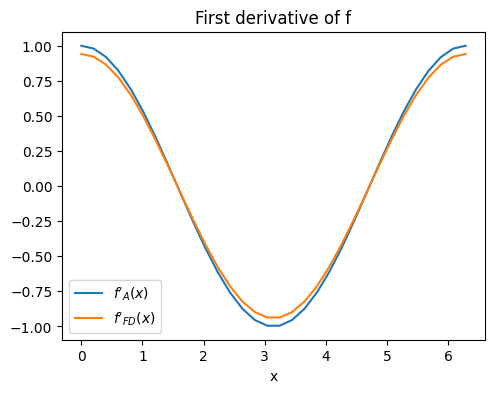

In [6]:
X = np.linspace(0,2*np.pi, 32)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title('First derivative of f')
plt.plot(X, fprime_A(X), label = '$f\'_A(x)$')
plt.plot(X, D1_CFD_O2(f_A,X,dx=0.6), label = '$f\'_{FD}(x)$')
plt.xlabel('x')
plt.legend()

Here we can plot the difference between the true analytical derivative and our finite difference approximation, and see how it depends on the size of dx. Notice that when dx is halved (from dx = 0.6 (10 points per period or wavelength) to dx = 0.3 (20 points per period or wavelength)), the maximum error drops by a factor of $(2)^2$. This is consistent with a second-order accurate method -- the truncation error is of order $dx^2$.

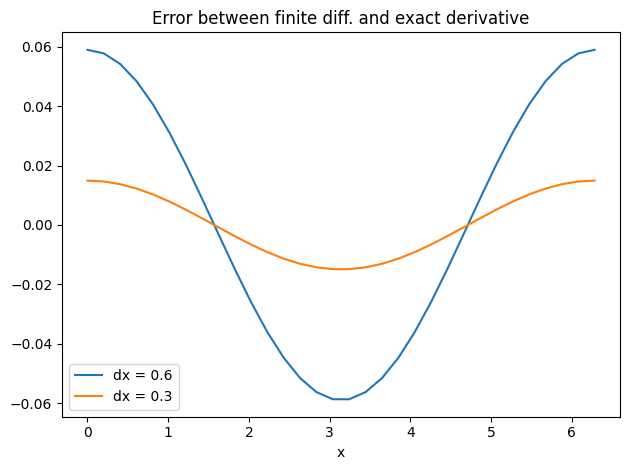

In [7]:
plt.title('Error between finite diff. and exact derivative')
plt.plot(X, fprime_A(X)-D1_CFD_O2(f_A,X,dx=0.6), label = 'dx = 0.6')
plt.plot(X, fprime_A(X)-D1_CFD_O2(f_A,X,dx=0.3), label = 'dx = 0.3')
plt.xlabel('x')
plt.legend()
plt.tight_layout()

Below we compute the mean absolute difference $<|f'_A(x) - f'_{FD}(x)|>_\rm{period}$ between the finite difference derivative and analytical derivative of $f(x)$ over a period. This will be our average measure of the derivative error. We then compute how this error depends on $dx$. Notice that we see the error dropping as $dx^2$ (consistent with the second order accurate truncation error that is expected), and that the round of error creeps in at $dx\sim10^{-5}$. For $dx\lesssim 10^{-5}$, the finite difference derivative error is dominated by round of error.

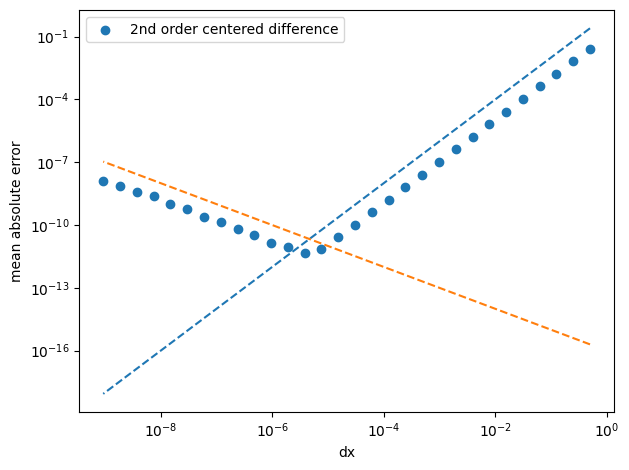

In [8]:
dx = [] # this is the list where we store the values of dx that we will use
error_CFD_O2 = [] # this is the list where we will store the values of the mean absolute difference between f'_A(x) and f'_FD(x)


DX = 1
for i in range(30):
    DX = DX/2
    dx.append(DX)
    err = np.mean(np.abs(fprime_A(X)-D1_CFD_O2(f_A,X,dx=DX)))
    error_CFD_O2.append(err)
    

plt.scatter(dx, error_CFD_O2, label = '2nd order centered difference')
plt.yscale('log')
plt.xscale('log')
plt.loglog(dx, np.array(dx)**2, ls = '--')
plt.loglog(dx, 1e-16/np.array(dx), ls = '--')
plt.xlabel('dx')
plt.ylabel('mean absolute error')
plt.legend()
plt.tight_layout()

## Exercises:

1) Implement routines for:

    a) a first-order accurate forward difference approximation to the first derivative (call this routine D1_FFD_O1; where D1 refers to 1st derivative, FFD refers to forward finite difference and O1 refers to 1st order accurate)
    b) a fourth-order accurate centered difference approximation to the first derivative (call this routine D1_CFD_O4);

2) Plot the mean absolute error of these difference approximations for different values of $dx$ and overlay them in a copy of the figure prepared above (include the results of the D1_CFD_O2). Overlay lines that correspond to the scaling of the truncation errors of the respective methods, and verify that they are what is expected.

3) Comment on where round off errors begin to overcome the truncation error. Does happen for the same $dx$ across all methods?

In [18]:
def D1_FFD_O1(func, x, dx):
    """
    1st-order forward finite difference approximation of first derivative.
    Receives an arbitrary function "func" as argument, point "x" where you would like to evaluate the derivative, 
    and "dx" the spacing used to calculate the finite difference.
    """
    return (func(x+dx)-func(x))/dx

def D1_CFD_O4(func, x, dx):
    """
    4th-order centered finite difference approximation of first derivative.
    Receives an arbitrary function "func" as argument, point "x" where you would like to evaluate the derivative, 
    and "dx" the spacing used to calculate the finite difference.
    """
    return (func(x-2*dx)-8*func(x-dx)+8*func(x+dx)-func(x+2*dx))/(12*dx)

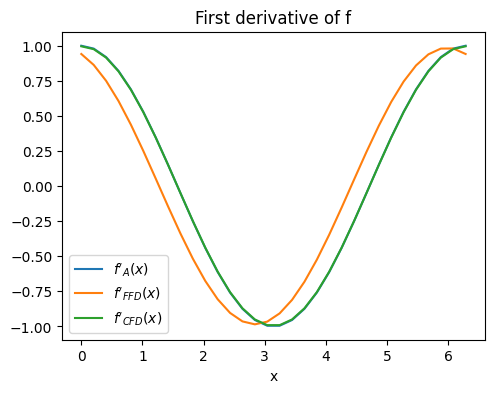

In [30]:
#Check that approximations are sensible
X = np.linspace(0,2*np.pi, 32)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title('First derivative of f')
plt.plot(X, fprime_A(X), label = '$f\'_A(x)$')
plt.plot(X, D1_FFD_O1(f_A,X,dx=0.6), label = '$f\'_{FFD}(x)$')
plt.plot(X, D1_CFD_O4(f_A,X,dx=0.6), label = '$f\'_{CFD}(x)$')
plt.xlabel('x')
plt.legend()

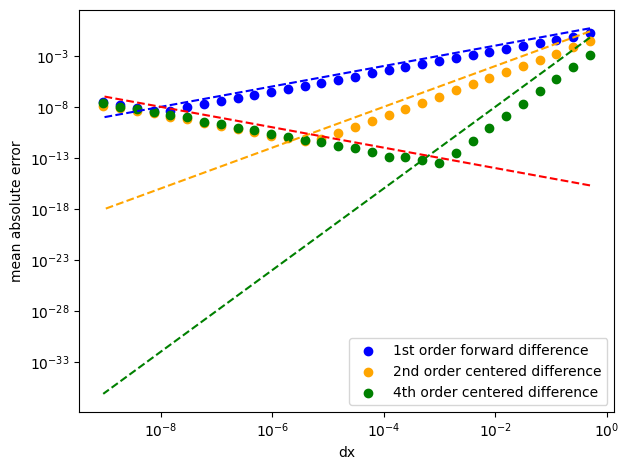

In [31]:
#Plot mean error

#Initialize lists
dx = [] 
error_FFD_O1 = []
error_CFD_O2 = [] 
error_CFD_O4 = []

#Calculate error loop
DX = 1
for i in range(30):
    DX = DX/2
    dx.append(DX)
    err_O1 = np.mean(np.abs(fprime_A(X)-D1_FFD_O1(f_A,X,dx=DX)))
    error_FFD_O1.append(err_O1)
    err_O2 = np.mean(np.abs(fprime_A(X)-D1_CFD_O2(f_A,X,dx=DX)))
    error_CFD_O2.append(err_O2)
    err_O4 = np.mean(np.abs(fprime_A(X)-D1_CFD_O4(f_A,X,dx=DX)))
    error_CFD_O4.append(err_O4)
    
    
# 1st Order Forward Difference
plt.scatter(dx, error_FFD_O1, label='1st order forward difference', color='b')
plt.loglog(dx, np.array(dx), ls='--', color='blue')  # 1st order trend as dx.

# 2nd Order Centered Difference
plt.scatter(dx, error_CFD_O2, label='2nd order centered difference', color='orange')
plt.loglog(dx, np.array(dx)**2, ls='--', color='orange')  # 2nd order trend as dx^2.

# 4th Order Centered Difference
plt.scatter(dx, error_CFD_O4, label='4th order centered difference', color='g')
plt.loglog(dx, np.array(dx)**4, ls='--', color='green')  # 4th order trend as dx^4.

# 1/dx trend line
plt.loglog(dx, 1e-16/np.array(dx), ls='--', color='red')  # Color changed to red

# Other plot settings
plt.yscale('log')
plt.xscale('log')
plt.xlabel('dx')
plt.ylabel('mean absolute error')
plt.legend()
plt.tight_layout()

# Comments on error
We can see the trade off between truncation and round off error in the plot above. As our slice, dx is decreased the error decreases. Using a log plot we can easily check that the calculated error follows the expected  trend line.

A slope of 1 for 1st order accurate, 2 for 2nd order, and 4 for 4th, as expected. 

We cannot decrease the error arbitrarily however as we will eventually become limited by the percision of numbers represented in the computer. 

This is where round off error enters the picture and eventually comes to dominate. As we take smaller and smaller dx, the computer eventually fails to produce a better approximation using our chosen formula since it loses the ability to meaningfully distinguish its representations of the numbers involved and miscalculates.

#### Does round off error take over at the same value of dx for all methods?
No it does not. As seen in the plot, round off error begins to dominate at different values of dx depending on our method, specifically, higher-order finite difference methods often involve computing differences between numbers that are closer in value than in lower-order methods (because they use more points and often involve subtracting large coefficients). This can amplify round-off errors.

When dx is large, truncation errors dominate, and the benefit of higher-order approximations is evident. However, as dx becomes very small, round-off errors become significant. Due to the arithmetic nature of higher-order methods, round-off errors tend to manifest more prominently in them at relatively larger values of dx compared to simpler, lower-order methods.